<a href="https://colab.research.google.com/drive/1M2n9iDX9oGnNEarpU4Sk1DzFR6mvTm8p?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install the required packages

In [1]:
!pip install lmfit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 KB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 KB 4.9 MB/s eta 0:00:00


#Load the required packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit.models import PolynomialModel
from lmfit.models import ExpressionModel

#Load Mock dataset

In [3]:
# Define the data
x = np.array((1.0, 2.0, 3.0, 4.0, 5.0))
y = np.array((2.3, 6.1, 8.2, 4.1, 15.0))
yerr = np.array([0.4, 0.6, 1. , 0.8, 1.4])

#Plot datapoint

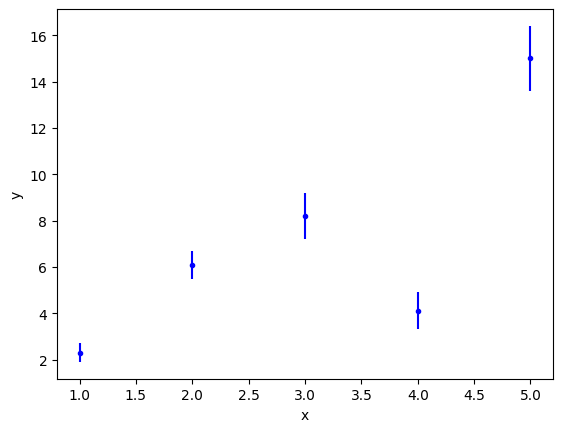

In [5]:
plt.errorbar(x,y,yerr,fmt='b.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#Run lmfit package

In [6]:
mod = ExpressionModel('a+b*x')
pars = mod.make_params(a=0, b=0)
result = mod.fit(y, pars, x=x, weights=1.0/yerr)

##Print results

In [7]:
print(result.fit_report())

[[Model]]
    Model(_eval)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 5
    # variables        = 2
    chi-square         = 49.9838563
    reduced chi-square = 16.6612854
    Akaike info crit   = 15.5113108
    Bayesian info crit = 14.7301867
    R-squared          = 0.48284716
[[Variables]]
    a:  0.94693600 +/- 2.21078363 (233.47%) (init = 0)
    b:  1.78426443 +/- 0.96042541 (53.83%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.8475


##Plot Hubble parameter best fit curve

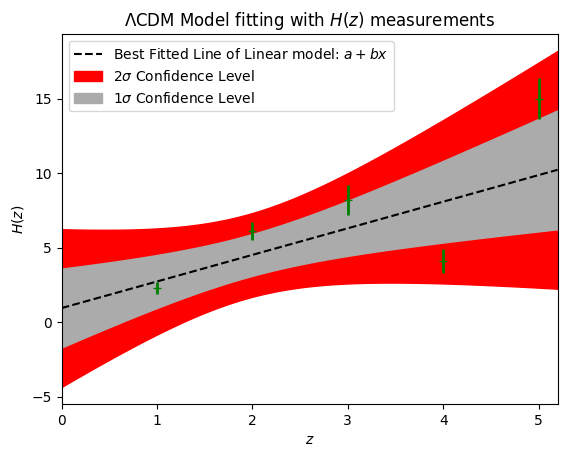

In [12]:
xfine = np.arange(0,5.2,0.001)
ypred = result.eval(x=xfine)
dely = result.eval_uncertainty(x=xfine, sigma=1)
plt.errorbar(x, y, yerr, linewidth=2, color='g', ls='none', mfc='r', marker='+', markersize=6)
plt.plot(xfine, ypred, 'k--',label='Best Fitted Line of Linear model: $a+bx$')
plt.fill_between(xfine, ypred-2*dely, ypred+2*dely, color="r",label="$2\sigma$ Confidence Level")
plt.fill_between(xfine, ypred-dely, ypred+dely, color="#ABABAB",label="$1\sigma$ Confidence Level")
plt.title('$\Lambda$CDM Model fitting with $H(z)$ measurements')
plt.xlim(0,5.2)
plt.grid(False)
plt.xlabel('$z$')
plt.ylabel('$H(z)$')
plt.legend(loc="upper left")

##Save Final Output

In [13]:
plt.savefig('Linear_model_fit_mock_data_u_lmfit.pdf', format='pdf', dpi=1200)


<Figure size 640x480 with 0 Axes>